In [1]:
import csv
import json
import networkx as nx
edges = {}

with open('graph.csv', newline='') as graph_csv_file:
    reader = csv.DictReader(graph_csv_file)
    for row in reader:
        edges[row['node']] = json.loads(row['edges_within_category'])['key']
        edges[row['node']].extend(json.loads(row['edges_outside_category'])['key'])

In [2]:
G = nx.DiGraph()

In [3]:
for source_article, target_articles in edges.items():
    for target_article in target_articles:
        G.add_edge(source_article, target_article)

In [4]:
betweenness_centrality = nx.betweenness_centrality(G)

In [5]:
betweenness_centrality_values = list(betweenness_centrality.values())

In [6]:
import numpy as np
mean_centrality = np.mean(betweenness_centrality_values)
median_centrality = np.median(betweenness_centrality_values)
max_centrality = np.max(betweenness_centrality_values)
min_centrality = np.min(betweenness_centrality_values)
std_centrality = np.std(betweenness_centrality_values)


print(f"Mean Centrality: {mean_centrality}")
print(f"Median Centrality: {median_centrality}")
print(f"Max Centrality: {max_centrality}")
print(f"Min Centrality: {min_centrality}")
print(f"Standard Deviation of Centrality: {std_centrality}")

Mean Centrality: 0.00014806724087547524
Median Centrality: 5.395313424728606e-06
Max Centrality: 0.053242622223059206
Min Centrality: 0.0
Standard Deviation of Centrality: 0.0010246212990612006


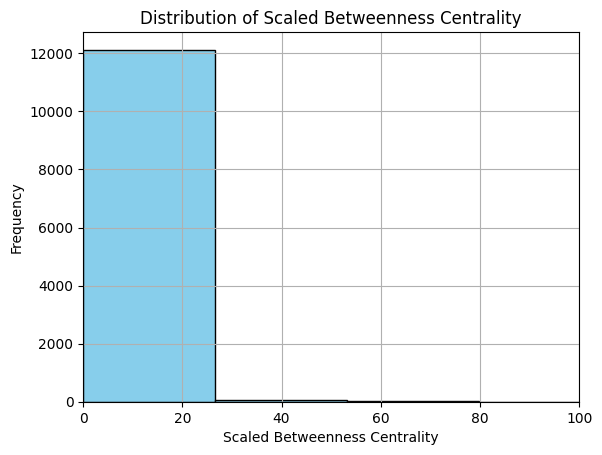

In [7]:
import matplotlib.pyplot as plt
scaling_factor = 10000
scaled_betweenness = {article: centrality * scaling_factor for article, centrality in betweenness_centrality.items()}

plt.hist(scaled_betweenness.values(), bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Scaled Betweenness Centrality')
plt.ylabel('Frequency')
plt.title('Distribution of Scaled Betweenness Centrality')
plt.xlim(0, 100)
plt.grid(True)
plt.show()

In [8]:
sorted_centrality = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)
top_20_pairs = sorted_centrality[:20]
for i, (article, centrality) in enumerate(top_20_pairs, 1):
    print(f"{i}. Article: {article}, Betweenness Centrality: {centrality}")

1. Article: Brazil, Betweenness Centrality: 0.053242622223059206
2. Article: Peru, Betweenness Centrality: 0.04306244574809175
3. Article: Argentina, Betweenness Centrality: 0.03890668119256319
4. Article: Chile, Betweenness Centrality: 0.0341058116610783
5. Article: Timeline of Brazilian history, Betweenness Centrality: 0.025452338351372214
6. Article: Uruguay, Betweenness Centrality: 0.023142513646146196
7. Article: Lima, Betweenness Centrality: 0.018615375194354303
8. Article: Fauna of Uruguay, Betweenness Centrality: 0.014950260394181517
9. Article: List of wars involving Chile, Betweenness Centrality: 0.014247128032611548
10. Article: Colombia, Betweenness Centrality: 0.012803174008244685
11. Article: Paraguayan War, Betweenness Centrality: 0.01266849453953356
12. Article: Empire of Brazil, Betweenness Centrality: 0.012123410609236654
13. Article: Venezuela, Betweenness Centrality: 0.011591587330146688
14. Article: South America, Betweenness Centrality: 0.011242838691821135
15. Ar

In [9]:
katz_centrality = nx.katz_centrality_numpy(G)

In [10]:
katz_centrality_values = list(katz_centrality.values())

In [11]:
mean_centrality = np.mean(katz_centrality_values)
median_centrality = np.median(katz_centrality_values)
max_centrality = np.max(katz_centrality_values)
min_centrality = np.min(katz_centrality_values)
std_centrality = np.std(katz_centrality_values)


print(f"Mean Centrality: {mean_centrality}")
print(f"Median Centrality: {median_centrality}")
print(f"Max Centrality: {max_centrality}")
print(f"Min Centrality: {min_centrality}")
print(f"Standard Deviation of Centrality: {std_centrality}")

Mean Centrality: 7.993056239936387e-05
Median Centrality: -8.628814641213625e-05
Max Centrality: 0.07836152857588681
Min Centrality: -0.07102535589550593
Standard Deviation of Centrality: 0.00904729059066017


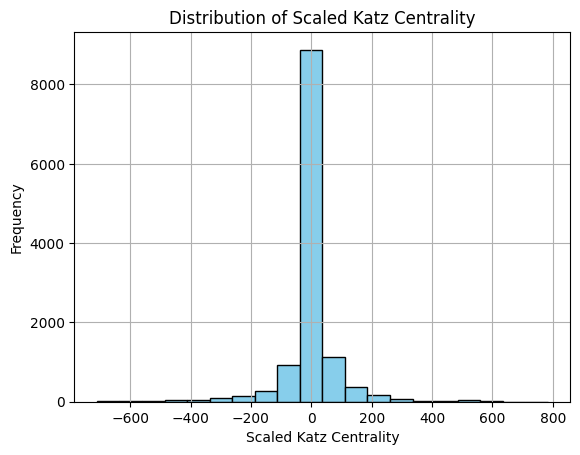

In [12]:
scaled_katz = {article: centrality * scaling_factor for article, centrality in katz_centrality.items()}
plt.hist(scaled_katz.values(), bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Scaled Katz Centrality')
plt.ylabel('Frequency')
plt.title('Distribution of Scaled Katz Centrality')
plt.grid(True)
plt.show()

In [13]:
sorted_centrality = sorted(katz_centrality.items(), key=lambda x: x[1], reverse=True)
top_20_pairs = sorted_centrality[:20]
for i, (article, centrality) in enumerate(top_20_pairs, 1):
    print(f"{i}. Article: {article}, Katz Centrality: {centrality}")

1. Article: Juan Domingo de Monteverde, Katz Centrality: 0.07836152857588681
2. Article: Simón Bolívar, Katz Centrality: 0.07764183217102907
3. Article: Antonio José de Sucre, Katz Centrality: 0.07747146621793947
4. Article: Republic of New Granada, Katz Centrality: 0.07426846631863052
5. Article: Argentina, Katz Centrality: 0.07419236819787754
6. Article: Paraguay, Katz Centrality: 0.0703558896676108
7. Article: Gran Colombia, Katz Centrality: 0.07002210210084897
8. Article: San Juan Province, Argentina, Katz Centrality: 0.06572855981481315
9. Article: Battle of Boyacá, Katz Centrality: 0.0653473030266842
10. Article: Salta Province, Katz Centrality: 0.06363908344138401
11. Article: Santiago del Estero Province, Katz Centrality: 0.0623959202175339
12. Article: Jujuy Province, Katz Centrality: 0.06230543100896822
13. Article: Juan Manuel Cajigal, Katz Centrality: 0.06227516579542371
14. Article: Upper Peru, Katz Centrality: 0.06111857778040793
15. Article: Viceroyalty of Peru, Katz Cen

In [14]:
hub, authority = nx.hits(G)

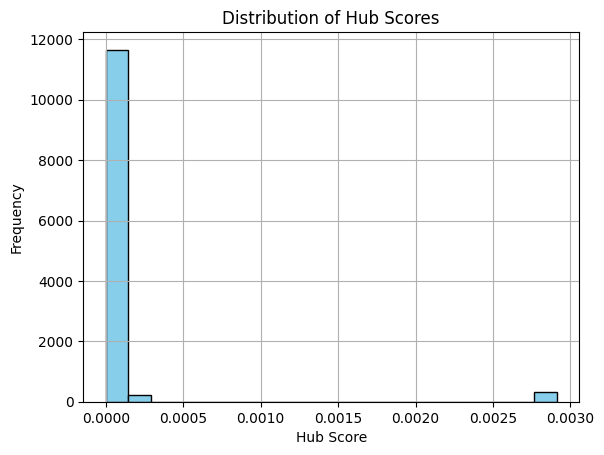

In [15]:
plt.hist(hub.values(), bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Hub Score')
plt.ylabel('Frequency')
plt.title('Distribution of Hub Scores')
plt.grid(True)
plt.show()

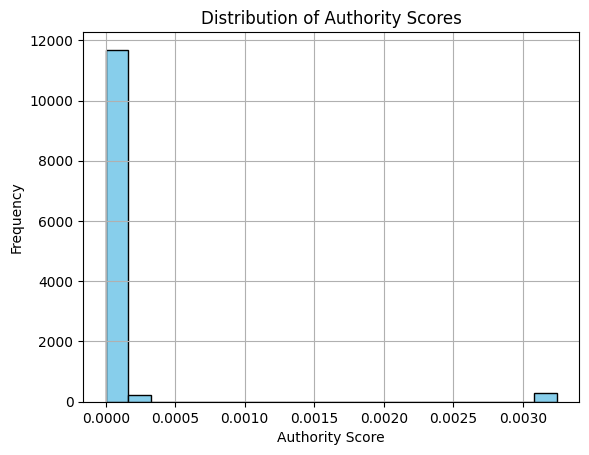

In [16]:
plt.hist(authority.values(), bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Authority Score')
plt.ylabel('Frequency')
plt.title('Distribution of Authority Scores')
plt.grid(True)
plt.show()

In [17]:
sorted_hub = sorted(hub.items(), key=lambda x: x[1], reverse=True)
top_20_hub = sorted_hub[:20]
for i, (article, hub_score) in enumerate(top_20_hub, 1):
    print(f"{i}. Article: {article}, hub score: {hub_score}")

1. Article: Huaca Huallamarca, hub score: 0.0029108420908323185
2. Article: Pachacamac, hub score: 0.0029085194136616436
3. Article: Huaca Pucllana, hub score: 0.0029036398214181683
4. Article: Puruchuco, hub score: 0.002899214783076943
5. Article: Cusco, hub score: 0.0028267959139916705
6. Article: Cuzco, hub score: 0.0028267959139916705
7. Article: Real Audiencia of Cusco, hub score: 0.0028267959139916705
8. Article: Chav�n de Huantar, hub score: 0.0028130999521498224
9. Article: Machu Picchu, hub score: 0.002810526204413896
10. Article: Qasa Pata, hub score: 0.0028100362725217844
11. Article: Q'asa Pata, hub score: 0.0028100362725217844
12. Article: Wich'un, hub score: 0.0028098613737973246
13. Article: Huich�n, hub score: 0.0028098613737973246
14. Article: Awkin Punta, hub score: 0.002809569747712319
15. Article: Auquin Punta, hub score: 0.002809569747712319
16. Article: Anku, hub score: 0.0028091877458324027
17. Article: Purunllacta, Cheto, hub score: 0.002809133068142733
18. Arti

In [18]:
sorted_authority = sorted(authority.items(), key=lambda x: x[1], reverse=True)
top_20_authority = sorted_authority[:20]
for i, (article, authority_score) in enumerate(top_20_authority, 1):
    print(f"{i}. Article: {article}, hub score: {authority_score}")

1. Article: Peru, hub score: 0.003242960923504836
2. Article: Pachacamac, hub score: 0.0032329281353528395
3. Article: Puruchuco, hub score: 0.003226861955976388
4. Article: Huaca Pucllana, hub score: 0.003226747031110552
5. Article: Huaca Huallamarca, hub score: 0.0032267224492338355
6. Article: Machu Picchu, hub score: 0.003121255494783474
7. Article: Chavín de Huantar, hub score: 0.003115195938265232
8. Article: Sipán, hub score: 0.003114102020613881
9. Article: Coricancha, hub score: 0.003113590564684913
10. Article: Wanakawri, Cusco, hub score: 0.0031131234814566577
11. Article: Kuelap, hub score: 0.0031129555928260783
12. Article: Tipón, hub score: 0.0031126161092379996
13. Article: Kusichaka River, hub score: 0.0031125559057466664
14. Article: Archaeological sites in Peru, hub score: 0.0031124782568763983
15. Article: Qillqay Mach'ay, hub score: 0.0031122884468409062
16. Article: Susupillu, hub score: 0.003112256335001156
17. Article: Wich'un, hub score: 0.0031122355365819647
18

In [19]:
import json

with open("ranked_pageviews.json", "r") as file:
    ranked_pageviews = json.load(file)
ranks = []
for i, (article, centrality) in enumerate(top_20_pairs, 1):
    if article in ranked_pageviews:
        rank = ranked_pageviews[article]
        ranks.append(rank)

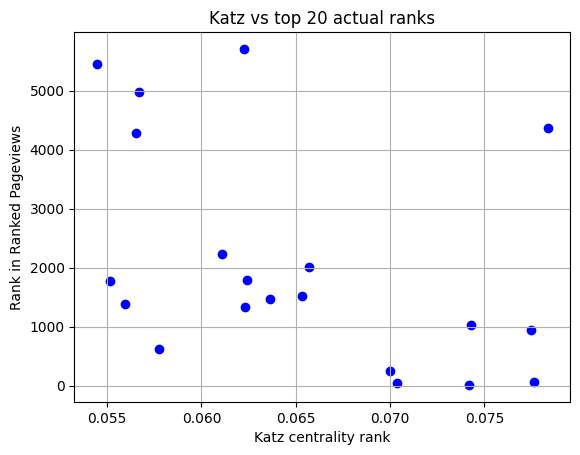

In [27]:
centrality_ranks = [pair[1] for pair in top_20_pairs]
plt.scatter(centrality_ranks, ranks, color='blue', marker='o')
plt.xlabel('Katz centrality rank')
plt.ylabel('Rank in Ranked Pageviews')
plt.title('Katz vs top 20 actual ranks')
plt.grid(True)
plt.show()

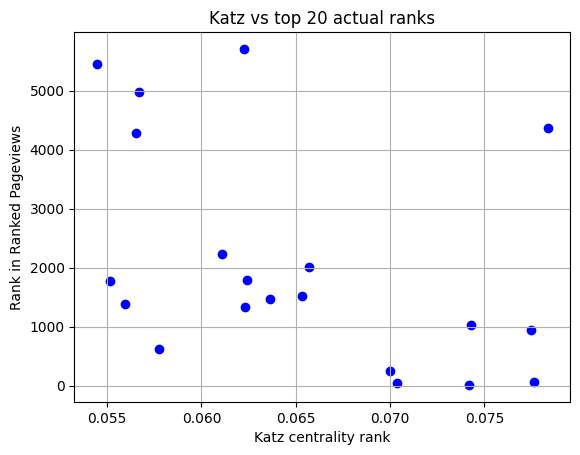

In [33]:
ranks = {}
for i, (article, centrality) in enumerate(top_20_pairs, 1):
    if article in ranked_pageviews:
        ranks[article] = ranked_pageviews[article]
centrality_ranks = [pair[1] for pair in top_20_pairs if pair[0] in ranks]
plt.scatter(centrality_ranks, list(ranks.values()), color='blue', marker='o')
plt.xlabel('Katz centrality rank')
plt.ylabel('Rank in Ranked Pageviews')
plt.title('Katz vs top 20 actual ranks')
plt.grid(True)
plt.show()

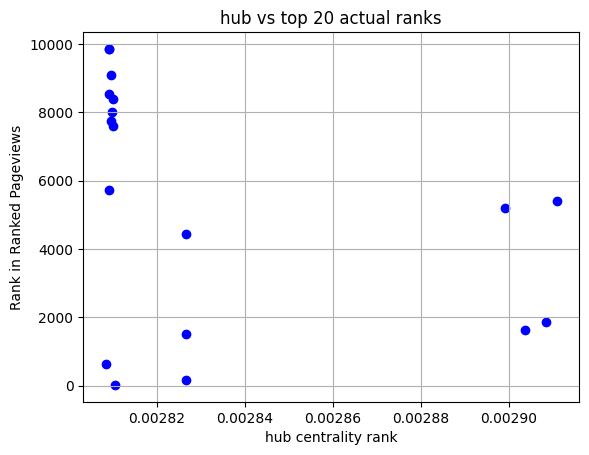

In [34]:
ranks = {}
for i, (article, centrality) in enumerate(top_20_hub, 1):
    if article in ranked_pageviews:
        ranks[article] = ranked_pageviews[article]
hub_ranks = [pair[1] for pair in top_20_hub if pair[0] in ranks]
plt.scatter(hub_ranks, list(ranks.values()), color='blue', marker='o')
plt.xlabel('hub centrality rank')
plt.ylabel('Rank in Ranked Pageviews')
plt.title('hub vs top 20 actual ranks')
plt.grid(True)
plt.show()

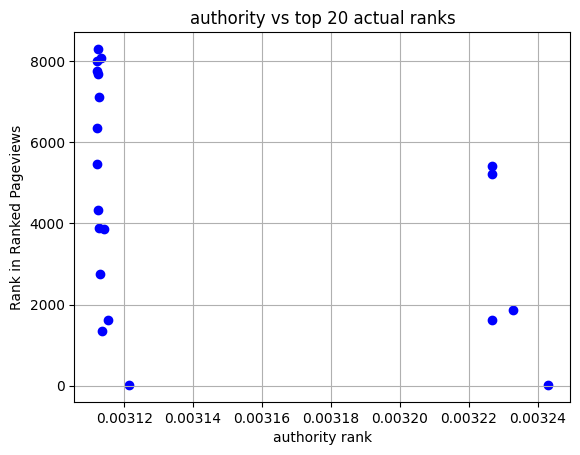

In [35]:
ranks = {}
for i, (article, centrality) in enumerate(top_20_authority, 1):
    if article in ranked_pageviews:
        ranks[article] = ranked_pageviews[article]
authority_ranks = [pair[1] for pair in top_20_authority if pair[0] in ranks]
plt.scatter(authority_ranks, list(ranks.values()), color='blue', marker='o')
plt.xlabel('authority rank')
plt.ylabel('Rank in Ranked Pageviews')
plt.title('authority vs top 20 actual ranks')
plt.grid(True)
plt.show()